In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import os 
import scattertext as st
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
import re
from sklearn.feature_extraction import text
import warnings
import flair
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from corextopic import corextopic as ct
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",-1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\huawei\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
d=pd.read_csv('True.csv')
d

title  \
0      As U.S. budget fight looms, Republicans flip their fiscal script        
1      U.S. military to accept transgender recruits on Monday: Pentagon        
2      Senior U.S. Republican senator: 'Let Mr. Mueller do his job'            
3      FBI Russia probe helped by Australian diplomat tip-off: NYT             
4      Trump wants Postal Service to charge 'much more' for Amazon shipments   
...                                                                      ...   
21412  'Fully committed' NATO backs new U.S. approach on Afghanistan           
21413  LexisNexis withdrew two products from Chinese market                    
21414  Minsk cultural hub becomes haven from authorities                       
21415  Vatican upbeat on possibility of Pope Francis visiting Russia           
21416  Indonesia to buy $1.14 billion worth of Russian jets                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [3]:
d["Truth"] = "True"

In [4]:
del d['date']

del d['text']

In [5]:
s=pd.read_csv('Fake.csv')
s

title  \
0       Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing              
1       Drunk Bragging Trump Staffer Started Russian Collusion Investigation                        
2       Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3       Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)               
4       Pope Francis Just Called Out Donald Trump During His Christmas Speech                       
...                                                                       ...                       
23476  McPain: John McCain Furious That Iran Treated US Sailors Well                                
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users            
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria        
23479  How to Blow $700 Million: Al Jazeera America Finally Calls it Quits                          
23480  10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [6]:
s["Truth"] = "Fake"

In [7]:
del s['date']

del s['text']

In [8]:
union = pd.concat([d, s], ignore_index=True)
union

,title,subject,Truth
0,"As U.S. budget fight looms, Republicans flip their fiscal script",politicsNews,True
1,U.S. military to accept transgender recruits on Monday: Pentagon,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',politicsNews,True
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,politicsNews,True
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,politicsNews,True
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated US Sailors Well,Middle-east,Fake
44894,"JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users",Middle-east,Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria,Middle-east,Fake
44896,How to Blow $700 Million: Al Jazeera America Finally Calls it Quits,Middle-east,Fake


In [9]:
union.drop_duplicates(['title'],inplace=True)
union

,title,subject,Truth
0,"As U.S. budget fight looms, Republicans flip their fiscal script",politicsNews,True
1,U.S. military to accept transgender recruits on Monday: Pentagon,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',politicsNews,True
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,politicsNews,True
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,politicsNews,True
...,...,...,...
44115,The White House and The Theatrics of ‘Gun Control’,US_News,Fake
44116,"Activists or Terrorists? How Media Controls and Dictates ‘The Narrative’ in Burns, Oregon",US_News,Fake
44117,"BOILER ROOM – No Surrender, No Retreat, Heads Will Roll – EP #38",US_News,Fake
44118,Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family – Bundys Lead Protest,US_News,Fake


In [10]:
news=union.copy()

In [11]:
n=news.sample(frac=1).reset_index(drop=True)

In [12]:
n

,title,subject,Truth
0,Indonesian envoy to urge Myanmar to halt violence against Rohingya Muslims,worldnews,True
1,"WHILE OBAMA VACATIONS AND HANDS OUT A BILLION DOLLAR GIFT TO KENYANS, IRAN’S AYATOLLAH TWEETS PICTURE OF BARACK WITH GUN TO HIS HEAD",politics,Fake
2,Putin: alleged Manafort Russian link fabricated by Trump opponents,politicsNews,True
3,London mayor calls for UK apology over colonial-era massacre in India,worldnews,True
4,Supreme Court's recent unity faces looming test,politicsNews,True
...,...,...,...
38724,OOPS! MEDIA LIED…Transgender Surgery For Military Members Cost Taxpayers A LOT More Than #FakeNews Is Telling Americans,politics,Fake
38725,China criticises India over crashed drone on border,worldnews,True
38726,Watch The Moment A White Teacher Gets SCHOOLED By His Student On Racism’s True Meaning (VIDEO),News,Fake
38727,NUTTY LEFTY Breaks Into TRUMP’S Mar-A-Lago Club…Vandalizes With Bananas,politics,Fake


In [13]:
n=n[0:1000]

In [14]:
n['Truth'].value_counts()

True    523
Fake    477
Name: Truth, dtype: int64

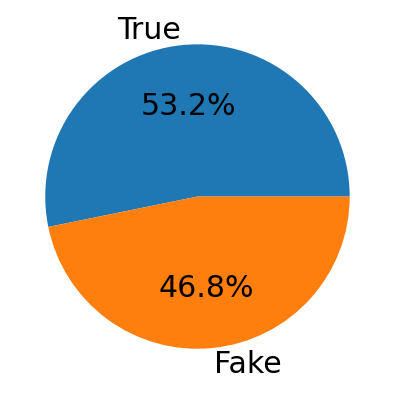

In [15]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
  
  
# Creating dataset
cars = ['True', 'Fake']
  
dat = [532, 468]
plt.rcParams['font.size'] = 30.0
# Creating plot
#plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
fig = plt.figure(figsize =(10, 7))
plt.pie(dat, labels = cars,autopct='%1.1f%%')
# show plot
plt.show()

In [16]:
zx=n.copy()

In [17]:
def clean(text):
    cleaned_text = []
    for tweet in text:
        cleaned_words = []
        for word in tweet.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text
zx['cleaned_title']=clean(zx['title'])

In [18]:
zx

,title,subject,Truth,cleaned_title
0,Indonesian envoy to urge Myanmar to halt violence against Rohingya Muslims,worldnews,True,indonesian envoy to urge myanmar to halt violence against rohingya muslims
1,"WHILE OBAMA VACATIONS AND HANDS OUT A BILLION DOLLAR GIFT TO KENYANS, IRAN’S AYATOLLAH TWEETS PICTURE OF BARACK WITH GUN TO HIS HEAD",politics,Fake,while obama vacations and hands out a billion dollar gift to kenyans irans ayatollah tweets picture of barack with gun to his head
2,Putin: alleged Manafort Russian link fabricated by Trump opponents,politicsNews,True,putin alleged manafort russian link fabricated by trump opponents
3,London mayor calls for UK apology over colonial-era massacre in India,worldnews,True,london mayor calls for uk apology over colonial era massacre in india
4,Supreme Court's recent unity faces looming test,politicsNews,True,supreme courts recent unity faces looming test
...,...,...,...,...
995,WATCH LIVE STREAM: SARAH PALIN To Endorse Trump – Big Day Of Endorsements For “The Donald” [VIDEO],politics,Fake,watch live stream sarah palin to endorse trump big day of endorsements for the donald video
996,Myanmar's Suu Kyi to visit China amid Western criticism over Rohingya exodus,worldnews,True,myanmars suu kyi to visit china amid western criticism over rohingya exodus
997,TransCanada Officially Files $15 Billion Lawsuit Against U.S. For Rejecting KXL Pipline,News,Fake,transcanada officially files billion lawsuit against us for rejecting kxl pipline
998,Pope says Trump 'not Christian' in a sign of global concern,politicsNews,True,pope says trump not christian in a sign of global concern


In [19]:
zx2=zx.copy()

In [20]:
zx3=zx2.copy()

In [21]:
def lemmatize_words(tweets, lemmatizer):
    cleaned_text=[]
    for tweet in tweets:
        cleaned_words=[]
        for word in tweet.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2
wordnet_lemmatizer = WordNetLemmatizer()
zx['cleaned_title']=lemmatize_words(zx['cleaned_title'],lemmatizer=wordnet_lemmatizer)

In [22]:
zx

,title,subject,Truth,cleaned_title
0,Indonesian envoy to urge Myanmar to halt violence against Rohingya Muslims,worldnews,True,indonesian envoy to urge myanmar to halt violence against rohingya muslim
1,"WHILE OBAMA VACATIONS AND HANDS OUT A BILLION DOLLAR GIFT TO KENYANS, IRAN’S AYATOLLAH TWEETS PICTURE OF BARACK WITH GUN TO HIS HEAD",politics,Fake,while obama vacation and hand out billion dollar gift to kenyan iran ayatollah tweet picture of barack with gun to his head
2,Putin: alleged Manafort Russian link fabricated by Trump opponents,politicsNews,True,putin alleged manafort russian link fabricated by trump opponent
3,London mayor calls for UK apology over colonial-era massacre in India,worldnews,True,london mayor call for uk apology over colonial era massacre in india
4,Supreme Court's recent unity faces looming test,politicsNews,True,supreme court recent unity face looming test
...,...,...,...,...
995,WATCH LIVE STREAM: SARAH PALIN To Endorse Trump – Big Day Of Endorsements For “The Donald” [VIDEO],politics,Fake,watch live stream sarah palin to endorse trump big day of endorsement for the donald video
996,Myanmar's Suu Kyi to visit China amid Western criticism over Rohingya exodus,worldnews,True,myanmar suu kyi to visit china amid western criticism over rohingya exodus
997,TransCanada Officially Files $15 Billion Lawsuit Against U.S. For Rejecting KXL Pipline,News,Fake,transcanada officially file billion lawsuit against for rejecting kxl pipline
998,Pope says Trump 'not Christian' in a sign of global concern,politicsNews,True,pope say trump not christian in sign of global concern


In [23]:
zx4=zx.copy()

In [24]:
zx5=zx4.copy()

In [25]:

stop = stopwords.words('english')
zx4['cleaned_title'] = zx4['cleaned_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [26]:
zx4

,title,subject,Truth,cleaned_title
0,Indonesian envoy to urge Myanmar to halt violence against Rohingya Muslims,worldnews,True,indonesian envoy urge myanmar halt violence rohingya muslim
1,"WHILE OBAMA VACATIONS AND HANDS OUT A BILLION DOLLAR GIFT TO KENYANS, IRAN’S AYATOLLAH TWEETS PICTURE OF BARACK WITH GUN TO HIS HEAD",politics,Fake,obama vacation hand billion dollar gift kenyan iran ayatollah tweet picture barack gun head
2,Putin: alleged Manafort Russian link fabricated by Trump opponents,politicsNews,True,putin alleged manafort russian link fabricated trump opponent
3,London mayor calls for UK apology over colonial-era massacre in India,worldnews,True,london mayor call uk apology colonial era massacre india
4,Supreme Court's recent unity faces looming test,politicsNews,True,supreme court recent unity face looming test
...,...,...,...,...
995,WATCH LIVE STREAM: SARAH PALIN To Endorse Trump – Big Day Of Endorsements For “The Donald” [VIDEO],politics,Fake,watch live stream sarah palin endorse trump big day endorsement donald video
996,Myanmar's Suu Kyi to visit China amid Western criticism over Rohingya exodus,worldnews,True,myanmar suu kyi visit china amid western criticism rohingya exodus
997,TransCanada Officially Files $15 Billion Lawsuit Against U.S. For Rejecting KXL Pipline,News,Fake,transcanada officially file billion lawsuit rejecting kxl pipline
998,Pope says Trump 'not Christian' in a sign of global concern,politicsNews,True,pope say trump christian sign global concern


In [27]:
corpus = st.CorpusFromPandas(zx4,
                             category_col='Truth',
                             text_col='cleaned_title',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [28]:
html3 = st.produce_scattertext_explorer(
        corpus,
        category='True',
        category_name='True',
        not_category_name='Fake',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        )

In [29]:
open('demo.html', 'wb').write(html3.encode('utf-8'));

In [30]:
zx6=zx4.copy()

In [31]:
coun_vect = CountVectorizer(stop_words=stop,ngram_range=(1,2))
count_matrix = coun_vect.fit_transform(zx4['cleaned_title'])
count_array = count_matrix.toarray()
titles_vec = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
titles_vec

,abadi,abadi say,abandon,abandon bias,abdullah,abdullah discus,abe,abe say,abe told,abedin,...,zombie reagan,zone,zone integration,zone without,zor,zor backed,zor ria,zor state,zuma,zuma appoints
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
zx7=zx4.copy()

In [33]:
tfidf_vect = TfidfVectorizer(stop_words=stop,ngram_range=(1,2))
tfidf_matrix = tfidf_vect.fit_transform(zx4['cleaned_title'])
tfidf_array = tfidf_matrix.toarray()
titles_tfidf = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names())
titles_tfidf

,abadi,abadi say,abandon,abandon bias,abdullah,abdullah discus,abe,abe say,abe told,abedin,...,zombie reagan,zone,zone integration,zone without,zor,zor backed,zor ria,zor state,zuma,zuma appoints
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
zx8=zx4.copy()

In [35]:
# function for displaying the words in each topic to be used for all models.
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [36]:
lsa_model_2 = TruncatedSVD(2)
lsa_cv_doc_topic = lsa_model_2.fit_transform(tfidf_matrix)

In [37]:
display_topics(lsa_model_2, tfidf_vect.get_feature_names(), 20) 


Topic  0
trump, video, say, white, house, donald, watch, donald trump, white house, president, obama, republican, hillary, new, make, tax, russia, get, trump say, senate

Topic  1
say, korea, north, north korea, house, white house, white, china, may, south, urge, pm, senate, talk, russia, house say, south korea, trump say, crisis, tillerson


In [38]:
zx9=zx4.copy()

In [39]:
lsa_model_3 = TruncatedSVD(3)
lsa_cv_doc_topic = lsa_model_3.fit_transform(tfidf_matrix)

In [40]:
display_topics(lsa_model_3, tfidf_vect.get_feature_names(), 15) 


Topic  0
trump, video, say, white, house, donald, donald trump, watch, white house, president, obama, republican, hillary, new, make

Topic  1
korea, north, say, north korea, china, house, white house, white, may, south, talk, urge, pm, britain, south korea

Topic  2
house, white, white house, house say, house speaker, speaker, court, ryan, penny, fox, speaker ryan, fox news, news, discus, mexico


In [41]:
lsa_model_8 = TruncatedSVD(8)
lsa_cv_doc_topic = lsa_model_8.fit_transform(tfidf_matrix)

In [42]:
display_topics(lsa_model_8, tfidf_vect.get_feature_names(), 15) 


Topic  0
trump, video, say, white, house, donald, donald trump, watch, white house, president, obama, republican, hillary, new, make

Topic  1
korea, north, north korea, say, house, china, white house, white, may, south, urge, pm, talk, south korea, crisis

Topic  2
house, white, white house, house say, court, house speaker, speaker, senate, tax, penny, high court, high, fox, fox news, russia

Topic  3
republican, say, bill, tax, senate, court, may, senator, vote, plan, supreme, supreme court, hillary, pm, obama

Topic  4
say, trump, donald trump, donald, pm, may, trump say, tax, brexit, pm may, adviser, britain, russia, republican, call

Topic  5
may, pm, video, brexit, pm may, britain, say, uk, eu, spokesman, call, uk pm, obama, talk, conservative

Topic  6
court, supreme court, supreme, donald, donald trump, president, say, gorsuch, high court, high, puerto, rico, puerto rico, court nominee, nominee

Topic  7
say, puerto, rico, puerto rico, president, video, trump say, hurricane, h

In [43]:
zx10=zx4.copy()

In [44]:
# function for displaying the words in each topic to be used for CorEx model.
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [45]:
#count vectorizer
words = list(np.asarray(coun_vect.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(count_matrix, words=words, docs=zx4['cleaned_title'])

#tf idf
words = list(np.asarray(tfidf_vect.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(tfidf_matrix, words=words, docs=zx4['cleaned_title'])

In [46]:
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
next, new york, york, relation, used, jerusalem, spokesman, al, shes, deir,  
 
topic  1 :
church, list, offer, transition, foundation, audio, cruz, vote, clinton, cancer,  
 
topic  2 :
mexico, percent, reuters, statement, supreme court, supreme, economic, wounded, wing, theory,  
 
topic  3 :
arrested, school, texas, charged, board, court, run, congress, rice, vet,  
 
topic  4 :
video, trump, supporter, news, trump supporter, hillary, house, white house, bad, white,  
 


In [47]:
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
president, north, north korea, china, pick, bill, korea, tax, president trump, new,  
 
topic  1 :
black, told, tillerson, work, state department, chief, senate, transition, aide, think,  
 
topic  2 :
supreme, supreme court, gop, mexico, candidate, time, two, percent, fear, donald,  
 
topic  3 :
pm, pm may, tweet, call, attack, claim, al, hate, ruling, climate,  
 
topic  4 :
special, trump supporter, hurricane, counsel, special counsel, supporter, watch, tower, trump tower, israel,  
 


In [48]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(tfidf_matrix)

In [49]:
display_topics(nmf_model_2, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, video, white, house, say, donald, donald trump, watch, white house, president, hillary, obama, republican, new, make

Topic  1
korea, north, north korea, say, china, south, may, south korea, japan, crisis, urge, peaceful, china urge, korean, missile


In [50]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_4.fit_transform(tfidf_matrix)

In [51]:
display_topics(nmf_model_4, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, video, donald, donald trump, watch, president, hillary, get, supporter, tweet, new, trump supporter, rally, jr, trump jr

Topic  1
korea, north, north korea, china, south, south korea, japan, urge, crisis, china urge, say, missile, peaceful, korean, test

Topic  2
house, white, white house, house say, discus, house speaker, speaker, penny, russia, fox, speaker ryan, israel, mexico, ryan, trump white

Topic  3
say, republican, senate, tax, may, bill, court, pm, plan, vote, senator, trump say, supreme court, supreme, brexit


In [52]:
nmf_model_5 = NMF(5)
nmf_doc_topic_5 = nmf_model_5.fit_transform(tfidf_matrix)

In [53]:
display_topics(nmf_model_5, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, donald, donald trump, watch, tweet, jr, trump jr, russian, meeting, adviser, get, twitter, trump supporter, supporter, rally

Topic  1
korea, north, north korea, china, south, south korea, japan, urge, china urge, crisis, missile, peaceful, korean, test, say

Topic  2
house, white, white house, house say, speaker, house speaker, discus, penny, russia, speaker ryan, fox, israel, court, ryan, mexico

Topic  3
say, republican, senate, may, tax, pm, bill, trump say, court, senator, brexit, pm may, plan, britain, vote

Topic  4
video, hillary, obama, clinton, president, new, hillary clinton, make, black, cnn, muslim, vote, tell, word, trump


In [54]:
nmf_model_6 = NMF(6)
nmf_doc_topic_6 = nmf_model_6.fit_transform(tfidf_matrix)

In [55]:
display_topics(nmf_model_6, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, donald, donald trump, watch, tweet, jr, trump jr, russian, meeting, adviser, get, twitter, trump supporter, supporter, lawyer

Topic  1
korea, north, north korea, china, south, south korea, urge, japan, china urge, crisis, missile, peaceful, test, korean, visit

Topic  2
house, white, white house, house say, discus, house speaker, speaker, penny, russia, israel, speaker ryan, mexico, fox, trump white, ryan

Topic  3
republican, court, senate, supreme, supreme court, tax, senator, plan, bill, vote, democrat, factbox, obama, healthcare, republican senator

Topic  4
video, hillary, clinton, obama, president, new, hillary clinton, black, cnn, make, tell, muslim, word, trump, sander

Topic  5
say, may, pm, pm may, brexit, britain, trump say, uk, talk, eu, spokesman, uk pm, election, call, puerto rico


In [56]:
nmf_model_7 = NMF(7)
nmf_doc_topic_7 = nmf_model_7.fit_transform(tfidf_matrix)

In [57]:
display_topics(nmf_model_7, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, donald, donald trump, watch, tweet, jr, trump jr, russian, meeting, adviser, get, trump supporter, twitter, supporter, lawyer

Topic  1
korea, north, north korea, china, south, south korea, urge, japan, china urge, crisis, missile, peaceful, korean, test, visit

Topic  2
house, white, white house, house say, discus, speaker, house speaker, penny, russia, israel, mexico, speaker ryan, trump white, fox, source

Topic  3
republican, tax, bill, senate, senator, plan, republican senator, vote, healthcare, puerto rico, puerto, rico, tax plan, factbox, tax bill

Topic  4
video, hillary, clinton, obama, president, new, black, hillary clinton, cnn, make, tell, word, muslim, trump, sander

Topic  5
say, may, pm, pm may, brexit, britain, uk, trump say, talk, spokesman, eu, uk pm, election, call, deal

Topic  6
court, supreme court, supreme, gorsuch, high, high court, obama, court nominee, nominee, gop, democrat, news, case, senate, face


In [58]:
nmf_model_8 = NMF(8)
nmf_doc_topic_8 = nmf_model_8.fit_transform(tfidf_matrix)

In [59]:
display_topics(nmf_model_8, tfidf_vect.get_feature_names(), 15)


Topic  0
trump, donald, donald trump, watch, tweet, jr, trump jr, russian, meeting, adviser, get, trump supporter, twitter, supporter, lawyer

Topic  1
korea, north, north korea, china, south, south korea, japan, china urge, crisis, missile, peaceful, urge, korean, say, test

Topic  2
house, white, white house, house say, discus, speaker, house speaker, penny, russia, israel, mexico, trump white, speaker ryan, fox, source

Topic  3
republican, tax, bill, senate, senator, plan, republican senator, healthcare, tax plan, factbox, tax bill, vote, democrat, repeal, lawmaker

Topic  4
video, hillary, clinton, obama, president, new, black, hillary clinton, cnn, tell, make, word, trump, muslim, sander

Topic  5
say, may, pm, pm may, brexit, britain, uk, talk, spokesman, eu, uk pm, trump say, election, call, deal

Topic  6
court, supreme court, supreme, gorsuch, high, high court, obama, court nominee, nominee, gop, democrat, news, case, face, justice

Topic  7
puerto rico, rico, puerto, hurric

In [60]:
topics_by_title = pd.DataFrame(nmf_doc_topic_7, columns = ['Trump Problems', 'US Presidency','East Asia','Middle East','Republicans','Democrats','Elections'])
topics_by_title['main_topic'] = topics_by_title.idxmax(axis=1)
topics_by_title['cleaned_title'] = zx4['cleaned_title']
topics_by_title['title'] = zx4['title']

In [61]:
topics_by_title.sample(10)

,Trump Problems,US Presidency,East Asia,Middle East,Republicans,Democrats,Elections,main_topic,cleaned_title,title
840,0.046695,0.250534,0.000000,0.000000,0.000000,0.000000,0.000000,US Presidency,trump putin speak hour syria ukraine north korea,"Trump and Putin speak for an hour about Syria, Ukraine, North Korea"
479,0.034028,0.000789,0.000000,0.009486,0.011506,0.000000,0.010375,Trump Problems,blood sport gop presidential race take another brutal turn party favorite tear trump,Blood Sport: GOP Presidential Race Takes Another Brutal Turn As ‘Party Favorites’ Tear Into Trump
708,0.007077,0.000426,0.001592,0.011730,0.005611,0.000923,0.009768,Middle East,lawmaker propose ban arbitration sexual misconduct claim,U.S. lawmakers propose ban on arbitration of sexual misconduct claims
637,0.072421,0.000000,0.000000,0.000000,0.006120,0.000000,0.007098,Trump Problems,obama pen stunning response trump cold blooded move daca trump fan ashamed,Obama Pens STUNNING Response To Trump’s Cold-Blooded Move On DACA – Trump Fans Should Be Ashamed
25,0.000000,0.000485,0.000000,0.000000,0.104273,0.000000,0.000000,Republicans,texas school official request new name go horribly wrong video,Texas School Officials Request For New Name Goes Horribly Wrong (VIDEO)
84,0.021736,0.000354,0.005512,0.000000,0.083431,0.000000,0.006429,Republicans,embarrassing nyc mayor de blasio cant tell difference trump obamas immigration policy video,EMBARRASSING! NYC MAYOR DE BLASIO Can’t Tell The Difference Between Trump And Obama’s Immigration Policy [Video]
902,0.041445,0.008505,0.000258,0.006944,0.000000,0.000000,0.000000,Trump Problems,giuliani already trying float excuse trump weasel future debate,Giuliani Already Trying To Float Excuses For Trump To Weasel Out Of Future Debates
185,0.000000,0.000000,0.000875,0.008631,0.061797,0.003094,0.014754,Republicans,obama make new push expand retirement saving,Obama makes new push to expand retirement savings
108,0.000000,0.000000,0.072353,0.002360,0.007902,0.000000,0.000000,East Asia,st paul mn public school white privilege training asks teacher wear hood,"ST PAUL, MN PUBLIC SCHOOLS ‘White Privilege’ TRAINING ASKS TEACHERS: “When do you wear the hood?”"
920,0.003340,0.239830,0.000000,0.000000,0.000000,0.000000,0.000000,US Presidency,north korea meeting seek better idea solve crisis canada,North Korea meeting seeks 'better ideas' to solve crisis: Canada


In [62]:
zx4['topic'] = topics_by_title['main_topic']

In [63]:
zx4.sample(5)

,title,subject,Truth,cleaned_title,topic
679,Senior Democratic National Committee officials resign: DNC,politicsNews,True,senior democratic national committee official resign dnc,Middle East
50,Biden pledges faster U.S. approval for cancer drug cocktails,politicsNews,True,biden pledge faster approval cancer drug cocktail,Trump Problems
530,May to pitch on Brexit at EU summit dinner,worldnews,True,may pitch brexit eu summit dinner,Democrats
342,Trump's election panel puts hold on voter data request,politicsNews,True,trump election panel put hold voter data request,Trump Problems
741,"Obama in 'excellent' health, still using nicotine gum: doctor",politicsNews,True,obama excellent health still using nicotine gum doctor,Republicans


In [64]:
zx11=zx4.copy()

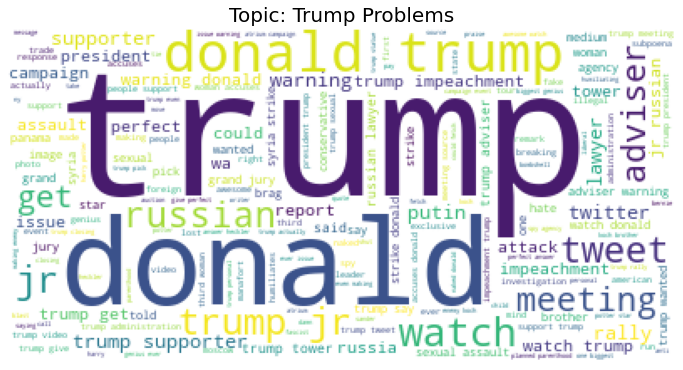

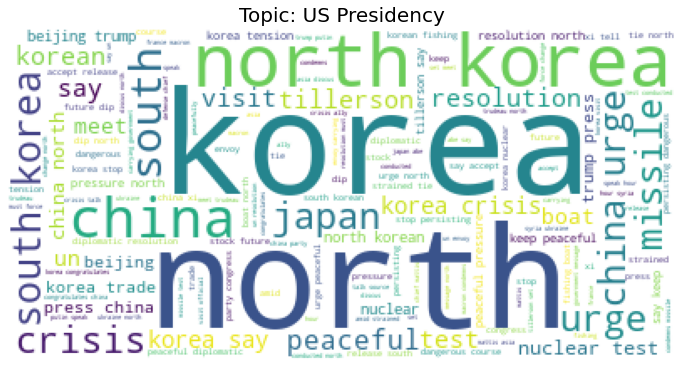

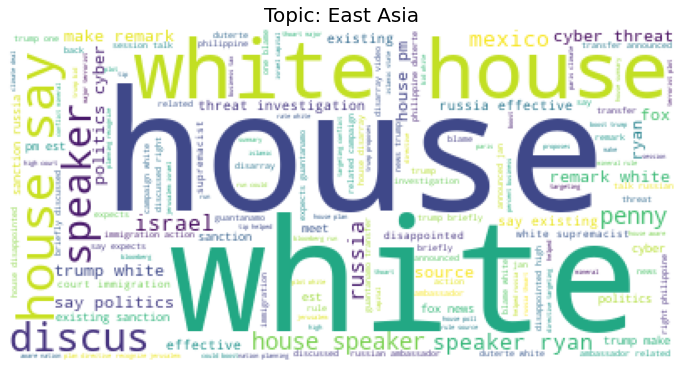

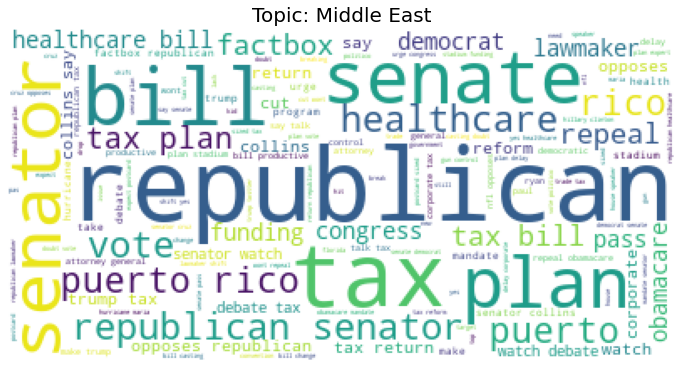

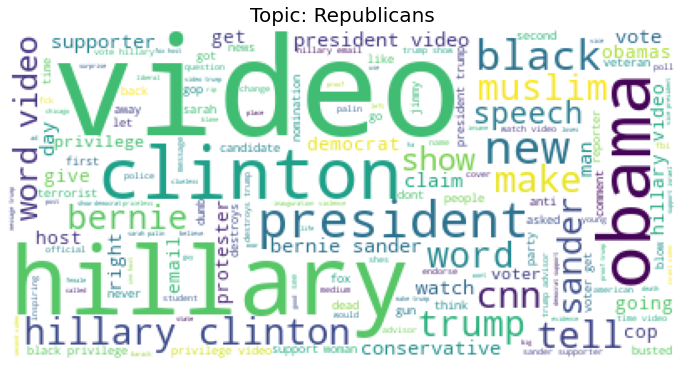

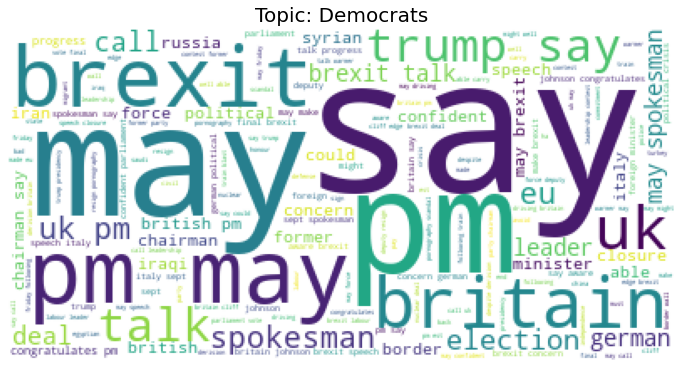

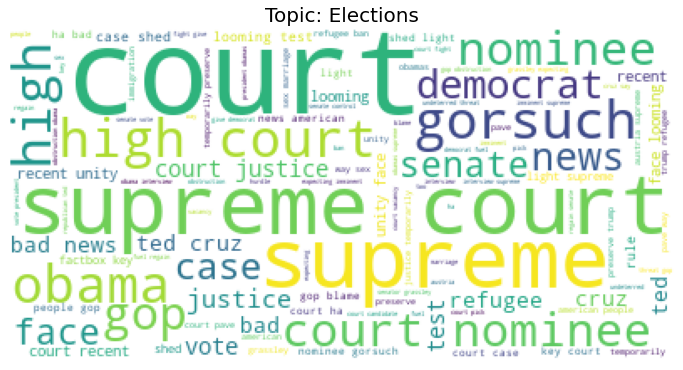

In [65]:
def get_word_freq(topic, model, n_top_words, vocab):
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

vocab=tfidf_vect.get_feature_names()

list_of_topics= ['Trump Problems', 'US Presidency','East Asia','Middle East','Republicans','Democrats','Elections']
for topic in range(7):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(get_word_freq(topic, nmf_model_7, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

In [66]:
zx12=zx4.copy()

In [67]:
flair = flair.models.TextClassifier.load('sentiment-fast');

2021-11-21 18:00:48,797 loading file C:\Users\huawei\.flair\models\sentiment-en-mix-ft-rnn_v8.pt


In [68]:
def classify(title):
    s = flair.data.Sentence(title)
    flair_sentiment.predict(s)
    y=str(s.labels[0]).split()
    label= y[0]
    score = y[1]
    score= float(re.sub('[()]', '', score))
    
 
    return label

In [69]:
zx4

,title,subject,Truth,cleaned_title,topic
0,Indonesian envoy to urge Myanmar to halt violence against Rohingya Muslims,worldnews,True,indonesian envoy urge myanmar halt violence rohingya muslim,US Presidency
1,"WHILE OBAMA VACATIONS AND HANDS OUT A BILLION DOLLAR GIFT TO KENYANS, IRAN’S AYATOLLAH TWEETS PICTURE OF BARACK WITH GUN TO HIS HEAD",politics,Fake,obama vacation hand billion dollar gift kenyan iran ayatollah tweet picture barack gun head,Republicans
2,Putin: alleged Manafort Russian link fabricated by Trump opponents,politicsNews,True,putin alleged manafort russian link fabricated trump opponent,Trump Problems
3,London mayor calls for UK apology over colonial-era massacre in India,worldnews,True,london mayor call uk apology colonial era massacre india,Democrats
4,Supreme Court's recent unity faces looming test,politicsNews,True,supreme court recent unity face looming test,Elections
...,...,...,...,...,...
995,WATCH LIVE STREAM: SARAH PALIN To Endorse Trump – Big Day Of Endorsements For “The Donald” [VIDEO],politics,Fake,watch live stream sarah palin endorse trump big day endorsement donald video,Republicans
996,Myanmar's Suu Kyi to visit China amid Western criticism over Rohingya exodus,worldnews,True,myanmar suu kyi visit china amid western criticism rohingya exodus,US Presidency
997,TransCanada Officially Files $15 Billion Lawsuit Against U.S. For Rejecting KXL Pipline,News,Fake,transcanada officially file billion lawsuit rejecting kxl pipline,Trump Problems
998,Pope says Trump 'not Christian' in a sign of global concern,politicsNews,True,pope say trump christian sign global concern,Democrats


In [70]:
zx13=zx4.copy()

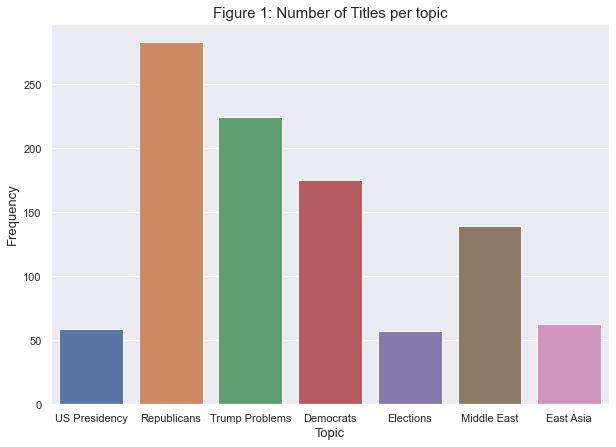

In [71]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="main_topic",data=topics_by_title);
ax.set_xlabel("Topic",fontsize=13);
ax.set_ylabel("Frequency",fontsize=13);
ax.set_title('Figure 1: Number of Titles per topic',fontsize=15);
plt.savefig('images/Figure1.png', dpi=200)

In [72]:
zx14=zx4.copy()

In [73]:
titles_2= zx4.copy(deep=True)
groups= titles_2.groupby(['topic','Truth']).size().reset_index(name='counts')

In [74]:
def get_total(topic):
    s= groups[groups['topic']==topic]
    return sum(list(s.counts))

In [75]:
groups['total']=groups['topic'].apply(lambda x:get_total(x))
groups['percent']= groups['counts']/groups['total']
groups

,topic,Truth,counts,total,percent
0,Democrats,Fake,19,175,0.108571
1,Democrats,True,156,175,0.891429
2,East Asia,Fake,23,63,0.365079
3,East Asia,True,40,63,0.634921
4,Elections,Fake,25,57,0.438596
5,Elections,True,32,57,0.561404
6,Middle East,Fake,43,139,0.309353
7,Middle East,True,96,139,0.690647
8,Republicans,Fake,235,283,0.830389
9,Republicans,True,48,283,0.169611


In [76]:
zx15=zx4.copy()

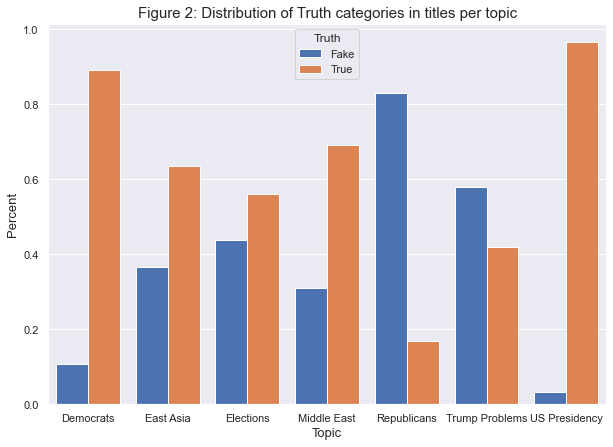

In [77]:
ind = np.arange(len(list(groups['percent'])))
ax.set_yticks(ind)
ax = sns.barplot(x="topic", y="percent", hue="Truth",data=groups, saturation=1)
ax.set_xlabel("Topic",fontsize=13);
ax.set_ylabel("Percent",fontsize=13);
ax.set_title('Figure 2: Distribution of Truth categories in titles per topic',fontsize=15);
plt.savefig('images/Figure2.png', dpi=200)

In [78]:
X = zx4.cleaned_title
y = zx4.Truth

In [79]:
X_rem, X_train, y_rem, y_train = train_test_split(X, y, test_size=.60, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=.5, random_state=42)

In [80]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_valid_tfidf = tfidf.transform(X_valid)

In [81]:
def model_metrics(model_name, y_train, y_pred_train, y, y_pred, test=False, save=False):
    
    if test:
        split_name = 'Testing'
    else:
        split_name = 'Validation'
    
    # save accuracy of each set 
    train_accu = classification_report(y_train, y_pred_train, output_dict=True)['accuracy'] * 100
    val_test_accu = classification_report(y, y_pred, output_dict=True)['accuracy'] * 100
        
    # print classification report (accuracy, f1, recall, precision) of each set
    print('Training Scores:\n\n', classification_report(y_train, y_pred_train), '_'*53, '\n')
    print(f'{split_name} Scores:\n\n', classification_report(y, y_pred), '_'*53, '\n')
        
    # print difference between training and validation/test
    print(f'Training/{split_name} Difference:', train_accu - val_test_accu, '\n')
        
    # save confusion matrix of each set
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val_test = confusion_matrix(y, y_pred)
    
    # plot heatmap of each set
    fig, ax = plt.subplots(1, 2, figsize=[12, 4])
    plt.suptitle(f'{model_name} Confusion Matrices')
    cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
    labels = ['Positive', 'Negative']
    sns.heatmap(cm_train, annot=True, fmt='d', linewidths=.5, ax=ax[0], cmap='YlGnBu', xticklabels=labels, yticklabels=labels).set_title('Training')
    sns.heatmap(cm_val_test, annot=True, fmt='d', linewidths=.5, ax=ax[1], cmap='YlGnBu', xticklabels=labels, yticklabels=labels).set_title(f'{split_name}')
    
    if save:
        plt.savefig(f'Images/{model_name} confusion matrices.png', bbox_inches='tight', transparent=True)

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [83]:
y_pred_train = knn.predict(X_train_tfidf)
y_pred = knn.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

        Fake       0.92      0.85      0.89       298
        True       0.86      0.93      0.90       302

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.79      0.77      0.78        84
        True       0.84      0.85      0.85       116

    accuracy                           0.82       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.82      0.82       200
 _____________________________________________________ 

Training/Validation Difference: 7.166666666666671 



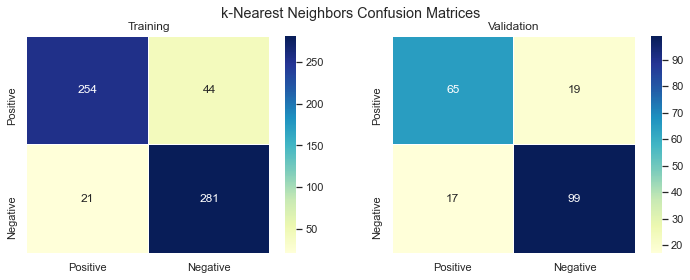

In [84]:
model_metrics('k-Nearest Neighbors', y_train, y_pred_train, y_valid, y_pred, test=False)

In [85]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=150)

Training Scores:

               precision    recall  f1-score   support

        Fake       0.92      0.85      0.89       298
        True       0.86      0.93      0.90       302

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.79      0.77      0.78        84
        True       0.84      0.85      0.85       116

    accuracy                           0.82       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.82      0.82       200
 _____________________________________________________ 

Training/Validation Difference: 7.166666666666671 



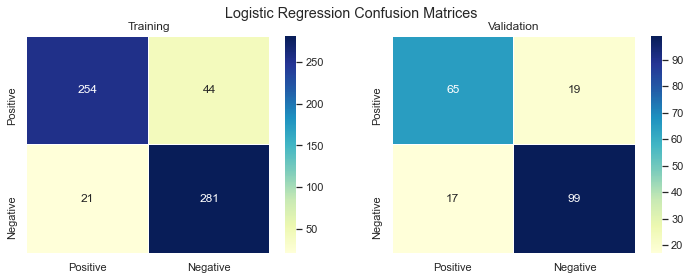

In [86]:
model_metrics('Logistic Regression', y_train, y_pred_train, y_valid, y_pred, test=False)

In [87]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [88]:
y_pred_train = dtc.predict(X_train_tfidf)
y_pred = dtc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       298
        True       1.00      1.00      1.00       302

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.72      0.69      0.71        84
        True       0.78      0.81      0.80       116

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.76       200
 _____________________________________________________ 

Training/Validation Difference: 24.0 



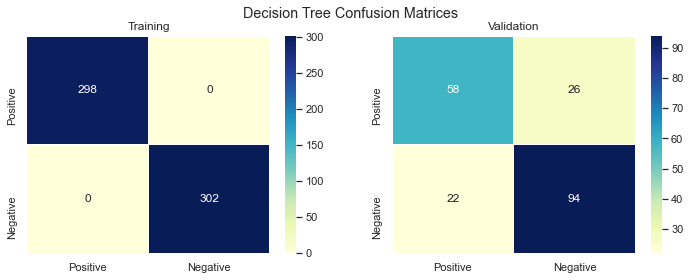

In [89]:
model_metrics('Decision Tree', y_train, y_pred_train, y_valid, y_pred, test=False)

In [90]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [91]:
y_pred_train = rfc.predict(X_train_tfidf)
y_pred = rfc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       298
        True       1.00      1.00      1.00       302

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.79      0.75      0.77        84
        True       0.82      0.85      0.84       116

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200
 _____________________________________________________ 

Training/Validation Difference: 19.0 



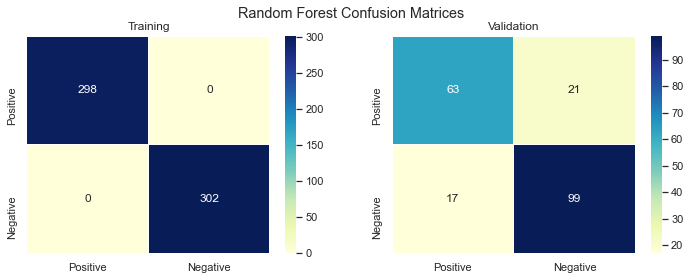

In [92]:
model_metrics('Random Forest', y_train, y_pred_train, y_valid, y_pred, test=False)

In [93]:
bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)

BernoulliNB()

In [94]:
y_pred_train = bnb.predict(X_train_tfidf)
y_pred = bnb.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

        Fake       1.00      0.98      0.99       298
        True       0.98      1.00      0.99       302

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.86      0.82      0.84        84
        True       0.88      0.91      0.89       116

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.87      0.87       200
 _____________________________________________________ 

Training/Validation Difference: 11.666666666666671 



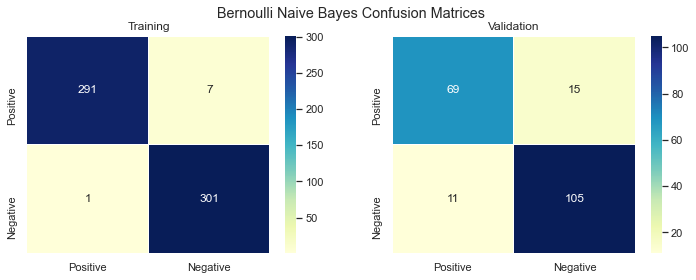

In [95]:
model_metrics('Bernoulli Naive Bayes', y_train, y_pred_train, y_valid, y_pred, test=False)

In [96]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [97]:
y_pred_train = mnb.predict(X_train_tfidf)
y_pred = mnb.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       298
        True       1.00      1.00      1.00       302

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

        Fake       0.73      0.88      0.80        84
        True       0.90      0.77      0.83       116

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.82       200
 _____________________________________________________ 

Training/Validation Difference: 18.33333333333333 



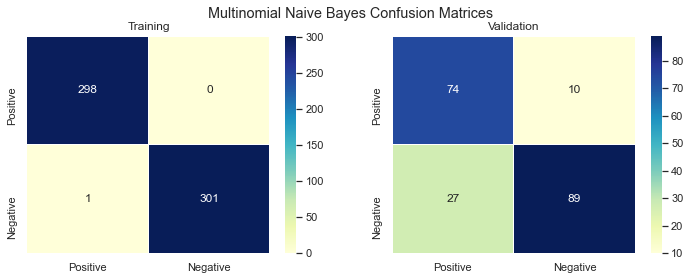

In [98]:
model_metrics('Multinomial Naive Bayes', y_train, y_pred_train, y_valid, y_pred, test=False)